<a href="https://colab.research.google.com/github/shiz-107/shiz-107/blob/main/Encryption_of_Uploaded_Picture_Using_S_box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving IMG-20221118-WA0089[1].jpg to IMG-20221118-WA0089[1].jpg


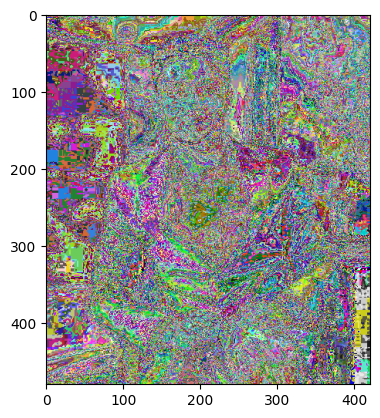

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

def encrypt_channel(channel, s_box):
    x, y = channel.shape
    enc_channel = np.zeros_like(channel, dtype=np.uint8)

    for m in range(x):
        for n in range(y):
            value = channel[m, n]
            value_bin = format(value, '08b')
            row = int(value_bin[:4], 2)
            col = int(value_bin[4:], 2)
            s_box_value = s_box[row][col]
            enc_value_bin = format(s_box_value, '08b')
            enc_channel[m, n] = int(enc_value_bin, 2)

    return enc_channel

def encrypt_image(image_path, s_box):
    img = np.array(Image.open(image_path))
    r_channel = img[:, :, 0]
    g_channel = img[:, :, 1]
    b_channel = img[:, :, 2]

    enc_r_channel = encrypt_channel(r_channel, s_box)
    enc_g_channel = encrypt_channel(g_channel, s_box)
    enc_b_channel = encrypt_channel(b_channel, s_box)

    enc_img = np.stack((enc_r_channel, enc_g_channel, enc_b_channel), axis=-1)

    return enc_img

# Load S-box from file
s_box = [
  [238, 117, 129, 181, 29, 21, 167, 113, 61, 187, 253, 6, 8, 233, 204, 91],
  [27, 66, 103, 130, 20, 121, 144, 217, 67, 49, 223, 70, 1, 186, 227, 245],
  [79, 2, 63, 3, 40, 77, 52, 221, 149, 216, 37, 191, 182, 132, 97, 96],
  [213, 198, 195, 246, 82, 102, 200, 139, 32, 127, 206, 58, 18, 208, 254, 170],
  [80, 126, 156, 46, 88, 145, 178, 115, 137, 210, 252, 230, 197, 163, 90, 231],
  [0, 55, 237, 24, 244, 4, 225, 99, 45, 125, 12, 13, 39, 196, 28, 15],
  [93, 161, 42, 123, 236, 43, 17, 57, 36, 154, 171, 150, 240, 128, 109, 243],
  [138, 59, 71, 78, 249, 19, 219, 35, 98, 14, 56, 60, 175, 155, 174, 84],
  [160, 234, 190, 111, 241, 180, 162, 185, 147, 85, 106, 141, 183, 62, 228, 214],
  [248, 105, 131, 100, 107, 157, 177, 153, 134, 151, 239, 222, 232, 11, 159, 119],
  [25, 38, 108, 83, 124, 176, 172, 158, 251, 112, 193, 188, 101, 44, 179, 92],
  [189, 247, 255, 76, 207, 212, 116, 48, 110, 136, 164, 250, 50, 30, 199, 89],
  [87, 203, 201, 72, 73, 205, 194, 184, 133, 5, 211, 135, 95, 142, 53, 218],
  [33, 209, 51, 148, 86, 114, 140, 75, 202, 168, 47, 26, 54, 16, 152, 69],
  [65, 165, 166, 81, 224, 122, 94, 192, 104, 229, 143, 118, 34, 226, 7, 9],
  [146, 242, 10, 120, 169, 23, 64, 235, 41, 68, 22, 31, 74, 173, 220, 215]
]

# Load and encrypt the image
encrypted_image = encrypt_image('IMG-20221118-WA0089[1].jpg', s_box)

# Display the encrypted image
plt.imshow(encrypted_image)
plt.show()
